In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pprint
from boto.s3.connection import S3Connection
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pylab as pl
import numpy as np

%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [24]:
import cPickle as pickle

pd_lasvegas = pickle.load(open('pd_lasvegas.pkl', 'rb'))

In [28]:
pd_lasvegas = pd_lasvegas.reset_index()
pd_lasvegas_0 = pd_lasvegas[["business_id", "stars_y", "cluster", "date_x", "date_y", "new"]][pd_lasvegas["cluster"] == 0]

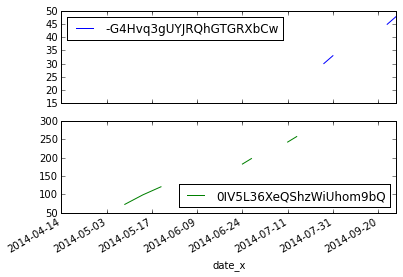

In [119]:
from datetime import date, datetime, time, timedelta

pd_lasvegas_new = pd_lasvegas_0[pd_lasvegas_0["new"] == True][["business_id", "stars_y", "date_x", "date_y"]]
pd_lasvegas_old = pd_lasvegas_0[pd_lasvegas_0["new"] == False][["business_id", "stars_y", "date_x"]]

new_len = len(pd_lasvegas_new)

delta = timedelta(days=180)
for i in range(new_len):
    frames = []
    new_bizid =pd_lasvegas_new.iloc[i].business_id
    start_date =pd_lasvegas_new.iloc[i].date_y
    new_ratings = pd_lasvegas_new[pd_lasvegas_new["business_id"] == new_bizid][pd.to_datetime(pd_lasvegas_new["date_x"]) < pd.to_datetime(start_date) + delta]
    old_ratings = pd_lasvegas_old[pd_lasvegas_old["date_x"] > start_date ][pd.to_datetime(pd_lasvegas_old["date_x"]) < pd.to_datetime(start_date) + delta]
    old_len = len(old_ratings)

    if len(new_ratings) < 20 or old_len < 20:
        continue
        
    #print "New ratings", new_ratings
    
    for j in range(old_len):
        old_bizid = old_ratings.iloc[j].business_id
        old_business = old_ratings[old_ratings["business_id"] == old_bizid]

        if len(old_business) < 10:
            continue
        else:
            ts = pd.concat([old_business[["business_id", "stars_y", "date_x"]], new_ratings[["business_id", "stars_y", "date_x"]]])
            ts = ts.drop_duplicates(['date_x','business_id'])
            ts = ts.pivot(index='date_x', columns='business_id', values='stars_y')
            ts = ts.cumsum()
            pd.rolling_sum(ts, 3).plot(subplots=True)
            break
    break
#print pd_lasvegas_new